In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
def simple_plot(input_MSA):
    cases = pd.read_csv('./data/output.csv')

    row = cases.loc[cases['name_msa'] == input_MSA]
    plt.figure(0)
    
    list_cases = list(row['cases'])
    
    plt.plot(row['interval_start'], row['cases'])
    plt.title('Covid-19 cases at ' + input_MSA + ', 2/14/2020 - 6/11/2020') 
    travels = pd.read_csv('./MSA_travel_aggregate_code/output.csv')

    
    list_travels = []
    for index, row in travels.iterrows():
        if (row['name_msa'] == input_MSA):
            list_travels =  list(row)
            list_travels.pop(0)
            dates = list(travels)
            dates.pop(0)
            plt.figure(1)
            plt.plot(dates, list_travels)
            plt.title('travelers to ' + input_MSA + ', 2/14/2020 - 6/11/2020')
            break
    
    if (len(list_travels) > len(list_cases)):
        for i in range(len(list_travels) - len(list_cases)):
            list_travels.pop(i)
            
    print(len(list_travels), len(list_cases))
    for i in range(14):
        list_cases.insert(i, 0)
    for i in range(14):
        list_travels.append(0)
    
    plt.figure(3)
    plt.scatter(list_travels, list_cases)
            
   

99 99


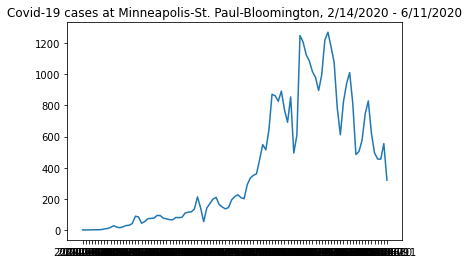

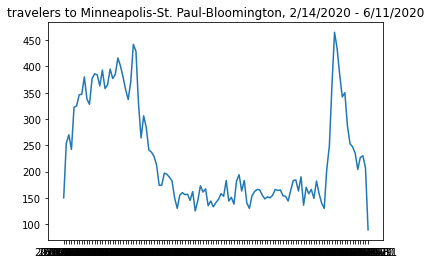

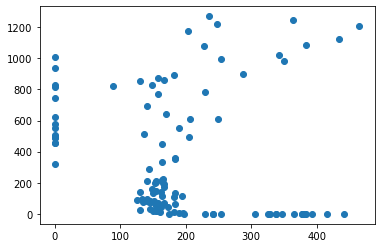

In [32]:
if __name__ == "__main__":
    
    simple_plot('Minneapolis-St. Paul-Bloomington')